# Exercise #3 "Decision trees"

### *In this exercise we will cover :*
#### * Data cleaning and preparation
####  * Decision trees
#### *  Decision trees parameter tuning
#### *  Ensembles and random forest
#### * Gradient boosting and XGBoost

Dataset: https://github.com/gastonstat/CreditScoring

In [111]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data cleaning and preparation

In [2]:
# Downloading data 
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'


In [3]:
!wget $data


--2021-10-24 14:24:47--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.003s  

2021-10-24 14:24:47 (50.4 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]



In [4]:
df = pd.read_csv(data)

In [5]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [6]:
df.columns = df.columns.str.lower()

In [7]:
# Making data easier for understanding
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [8]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [9]:
# Quick summary for data
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
columns = ["income","assets","debt"]
for c in columns:
    df[c] = df[c].replace(to_replace = 99999999.0 , value= np.nan)


In [11]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4454.0,4454.0,4454.0,4454.0,4420.0,4407.0,4436.0,4454.0,4454.0
mean,8.0,46.0,37.0,56.0,131.0,5404.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11574.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1117.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [13]:
df = df.fillna(0)
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [14]:
# Splitting data with scikit-learn
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state = 11)


In [15]:
y_train = (df_train.status =="default").astype("int").values
y_val = (df_val.status == "default").astype("int").values
y_test = (df_test.status == "default").astype("int").values

In [16]:
del df_train["status"]
del df_val["status"]
del df_test["status"]

In [17]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [18]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

# Decision trees

In [19]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [20]:
train_dicts = df_train.to_dict(orient = "records")

dv = DictVectorizer(sparse = False)
x_train = dv.fit_transform(train_dicts)

In [21]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
val_dicts = df_val.to_dict(orient = 'records')
x_val = dv.transform(val_dicts)

In [23]:
y_pred = dt.predict_proba(x_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6535564650892447

In [24]:
y_pred = dt.predict_proba(x_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [25]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [26]:
y_pred= dt.predict_proba(x_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred)

y_pred = dt.predict_proba(x_val)[:, 1]
auc_val = roc_auc_score(y_val, y_pred)
print("auc_train:",auc_train,"auc_val:",auc_val)

auc_train: 0.7054989859726213 auc_val: 0.6685264343319367


In [27]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



# Decision trees parameter tuning
* selecting max_depth

* selecting min_samples_leaf

In [28]:
depths = [2,3,4,5,6,7,8,10,20,None]
for depth in depths:
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(x_train, y_train)
    
    y_pred = dt.predict_proba(x_val)[:, 1]
    auc_val = roc_auc_score(y_val, y_pred)
    
    print((depth,auc_val ))

(2, 0.6685264343319367)
(3, 0.7389079944782155)
(4, 0.7612827250490422)
(5, 0.7664957254607541)
(6, 0.7490221840110436)
(7, 0.7397374730570827)
(8, 0.7288815964738078)
(10, 0.7019205153665448)
(20, 0.6573587464580659)
(None, 0.651655324404834)


In [29]:
d = [4,5,6]
sl = [1,10,50,100,200,500]
for depth in d:
    for s in sl:
        dt = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = s)
        dt.fit(x_train, y_train)
    
        y_pred = dt.predict_proba(x_val)[:, 1]
        auc_val = roc_auc_score(y_val, y_pred)
    
        print(("depth:",depth,"s:",s,"auc_val:",auc_val ))

('depth:', 4, 's:', 1, 'auc_val:', 0.7612827250490422)
('depth:', 4, 's:', 10, 'auc_val:', 0.7612827250490422)
('depth:', 4, 's:', 50, 'auc_val:', 0.7534571698433072)
('depth:', 4, 's:', 100, 'auc_val:', 0.7559365236976581)
('depth:', 4, 's:', 200, 'auc_val:', 0.7472602988544719)
('depth:', 4, 's:', 500, 'auc_val:', 0.679842459615897)
('depth:', 5, 's:', 1, 'auc_val:', 0.7664957254607541)
('depth:', 5, 's:', 10, 'auc_val:', 0.7618094742195636)
('depth:', 5, 's:', 50, 'auc_val:', 0.7681970647356566)
('depth:', 5, 's:', 100, 'auc_val:', 0.7633836671429609)
('depth:', 5, 's:', 200, 'auc_val:', 0.7590728003681189)
('depth:', 5, 's:', 500, 'auc_val:', 0.679842459615897)
('depth:', 6, 's:', 1, 'auc_val:', 0.757780145794483)
('depth:', 6, 's:', 10, 'auc_val:', 0.7782991450921508)
('depth:', 6, 's:', 50, 'auc_val:', 0.770288924947325)
('depth:', 6, 's:', 100, 'auc_val:', 0.7764343319367417)
('depth:', 6, 's:', 200, 'auc_val:', 0.7682666924995762)
('depth:', 6, 's:', 500, 'auc_val:', 0.67984245

In [30]:
# This is the best one ('depth:', 6, 's:', 10, 'auc_val:', 0.7778026688624642)

In [31]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)

In [32]:
y_pred = dt.predict_proba(x_val)[:, 1]
auc_val = roc_auc_score(y_val, y_pred)
auc_val

0.7778026688624642

# Ensembles and random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rn = list(range(10,201,10))
for n in rn:
    rf = RandomForestClassifier(n_estimators = n, random_state = 1)
    rf.fit(x_train , y_train)
    
    y_pred = rf.predict_proba(x_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    
    print("rn:",n,"auc:",auc)


rn: 10 auc: 0.7744726453706618
rn: 20 auc: 0.8035316412777603
rn: 30 auc: 0.8150747136179797
rn: 40 auc: 0.8156862270228379
rn: 50 auc: 0.8170818095953114
rn: 60 auc: 0.8164581870141193
rn: 70 auc: 0.8173209658279045
rn: 80 auc: 0.8163068223099464
rn: 90 auc: 0.8168244895982175
rn: 100 auc: 0.8175994768835824
rn: 110 auc: 0.8175268218255793
rn: 120 auc: 0.8179385338209295
rn: 130 auc: 0.8182533724056089
rn: 140 auc: 0.818102007701436
rn: 150 auc: 0.8172695018284857
rn: 160 auc: 0.8179809159380979
rn: 170 auc: 0.8176055314717492
rn: 180 auc: 0.8174632486498269
rn: 190 auc: 0.817980915938098
rn: 200 auc: 0.8190495507495582


In [35]:
for n in range(190,220,10):
    rf = RandomForestClassifier(n_estimators = n, random_state = 1)
    rf.fit(x_train , y_train)
    
    y_pred = rf.predict_proba(x_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    
    print("rn:",n,"auc:",auc)

rn: 190 auc: 0.817980915938098
rn: 200 auc: 0.8190495507495582
rn: 210 auc: 0.8190313869850573


In [36]:
# I think that the best n_estimators is 200 
# Let's select best max_depth and min_samples_leaf

In [37]:
depths = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,None)
for n in depths :
    rf = RandomForestClassifier(n_estimators = 200, random_state = 1,max_depth = n)
    rf.fit(x_train , y_train)
    
    y_pred = rf.predict_proba(x_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    
    print("depth:",n,"auc:",auc)

depth: 1 auc: 0.7820227168148023
depth: 2 auc: 0.788679736504323
depth: 3 auc: 0.7919915962316244
depth: 4 auc: 0.8022722869390424
depth: 5 auc: 0.8073520864110824
depth: 6 auc: 0.814399627037369
depth: 7 auc: 0.8206721803782906
depth: 8 auc: 0.8203512872054441
depth: 9 auc: 0.8234209634060691
depth: 10 auc: 0.8249225012714635
depth: 11 auc: 0.8235117822285729
depth: 12 auc: 0.823287762466397
depth: 13 auc: 0.8249467196241311
depth: 14 auc: 0.8250435930348017
depth: 15 auc: 0.8200909399142671
depth: 20 auc: 0.818153471700855
depth: None auc: 0.8190495507495582


In [38]:
#Best depths = (13,14)
# lets select best min_samples_leaf with depth = (13,14)

In [39]:
depths = (13,14)
sl = [1,10,50,100,200,500]
for n in depths :
    for s in sl:
        rf = RandomForestClassifier(n_estimators = 200,
                                random_state = 1,
                                max_depth = n,
                                min_samples_leaf = s)
        rf.fit(x_train , y_train)
     
        y_pred = rf.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
    
        print("depth:",n,"min_samples_leaf",s,"auc:",auc)

depth: 13 min_samples_leaf 1 auc: 0.8249467196241311
depth: 13 min_samples_leaf 10 auc: 0.8233906904652346
depth: 13 min_samples_leaf 50 auc: 0.8056689109006805
depth: 13 min_samples_leaf 100 auc: 0.7999473250829477
depth: 13 min_samples_leaf 200 auc: 0.7941712479717129
depth: 13 min_samples_leaf 500 auc: 0.7555127025259742
depth: 14 min_samples_leaf 1 auc: 0.8250435930348017
depth: 14 min_samples_leaf 10 auc: 0.8232090528202272
depth: 14 min_samples_leaf 50 auc: 0.8056689109006805
depth: 14 min_samples_leaf 100 auc: 0.7999473250829477
depth: 14 min_samples_leaf 200 auc: 0.7941712479717129
depth: 14 min_samples_leaf 500 auc: 0.7555127025259742


In [40]:
# We can go with (depth: 13 min_samples_leaf 1 auc: 0.8249467196241311  or
#                 depth: 14 min_samples_leaf 1 auc: 0.8250435930348017)
                 

In [41]:
# My random forest model
rf = RandomForestClassifier(n_estimators = 200,
                                random_state = 1,
                                max_depth = 14,
                                min_samples_leaf = 1)
rf.fit(x_train , y_train)
     
y_pred = rf.predict_proba(x_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
    
print("auc:",auc)

auc: 0.8250435930348017


# Gradient boosting and XGBoost

In [42]:
! pip install xgboost

In [43]:
import xgboost as xgb

In [44]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(x_train, label = y_train ,feature_names = features)
dval = xgb.DMatrix(x_val, label = y_val , feature_names = features)

In [45]:
egb_params = {
    "eta":0.3,
    "max_depth":6,
    "mean_child_weight":1,
    
    "obejective":"binary:logustic",
    "nthread":8,
    
    "seed":1,
    "verbosity":1,
        
                }
model = xgb.train(egb_params, dtrain, num_boost_round = 10)

[14:25:28] WARNING: /opt/conda/conda-bld/xgboost-base_1628832676711/work/src/learner.cc:541: 
Parameters: { mean_child_weight, obejective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [46]:
y_pred = model.predict(dval)

In [47]:
roc_auc_score(y_val,y_pred)

0.8096407207381755

In [48]:
watchlist = [(dtrain,"train"),(dval,"val")]

In [67]:
xgb_params = {
    "eta":0.3,
    "max_depth":6,
    "mean_child_weight":1,
    
    "obejective":"binary:logustic",
    "eval_metric":"auc",
    "nthread":8,
    
    "seed":1,
    "verbosity":1,
        
                }
model = xgb.train(xgb_params, dtrain, num_boost_round = 200,evals =watchlist, verbose_eval = 5)

[14:40:27] WARNING: /opt/conda/conda-bld/xgboost-base_1628832676711/work/src/learner.cc:541: 
Parameters: { mean_child_weight, obejective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.86796	val-auc:0.76441
[5]	train-auc:0.93956	val-auc:0.79989
[10]	train-auc:0.96468	val-auc:0.81069
[15]	train-auc:0.97616	val-auc:0.81847
[20]	train-auc:0.98323	val-auc:0.81617
[25]	train-auc:0.98895	val-auc:0.81533
[30]	train-auc:0.99159	val-auc:0.81358
[35]	train-auc:0.99449	val-auc:0.81302
[40]	train-auc:0.99643	val-auc:0.81131
[45]	train-auc:0.99775	val-auc:0.80996
[50]	train-auc:0.99897	val-auc:0.80850
[55]	train-auc:0.99949	val-auc:0.80768
[60]	train-auc:0.99968	val-auc:0.80520
[65]	train-auc:0.99980	val-auc:0.80216
[70]	train-auc:0.99989	val-auc:0.80042
[75]	train-auc:0.9

### Tuning the following parameters:

* eta

* max_depth

* min_child_weight

In [74]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [96]:
scores = {}

In [106]:
%%capture output

xgb_params = {
    'eta':1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [107]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1'

In [108]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=0.01', 'eta=1'])

In [109]:
df_score = parse_xgb_output(output)


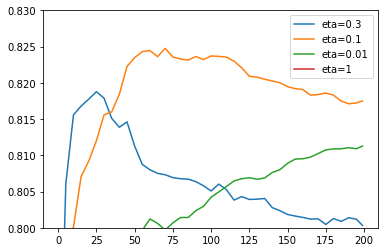

In [113]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)


plt.ylim(0.8, 0.83)
plt.legend()

In [ ]:
# As we see the best eta is 0.1

In [136]:
%%capture output

xgb_params = {
    'eta':0.1, 
    'max_depth': 1,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [137]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=1'

In [138]:
scores.keys()

dict_keys(['max_depth=2', 'max_depth=3', 'max_depth=4', 'max_depth=6', 'max_depth=1'])

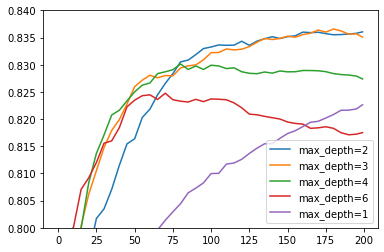

In [141]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)


plt.ylim(0.8, 0.84)
plt.legend()

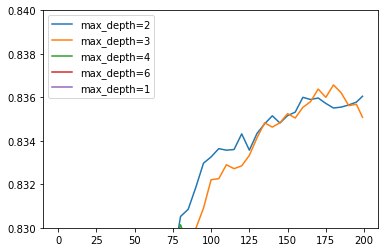

In [142]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)


plt.ylim(0.83, 0.84)
plt.legend()

In [ ]:
# As we see the best max_depth is 2

In [153]:
%%capture output

xgb_params = {
    'eta':0.1, 
    'max_depth': 2,
    'min_child_weight': 200,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [154]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=200'

In [155]:
scores.keys()

dict_keys(['min_child_weight=10', 'min_child_weight=50', 'min_child_weight=100', 'min_child_weight=200'])

In [146]:
del scores["max_depth=2"]
del scores["max_depth=3"]
del scores["max_depth=4"]
del scores["max_depth=6"]
del scores["max_depth=1"]

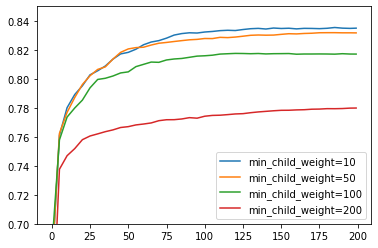

In [161]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)


plt.ylim(0.7, 0.85)
plt.legend()

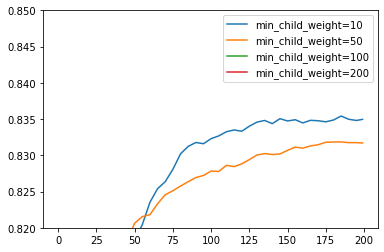

In [162]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)


plt.ylim(0.82, 0.85)
plt.legend()

In [ ]:
# As we see the best min_child_weight is 10

# Final model
xgb_params = {
    'eta':0.1, 
    'max_depth': 2,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [177]:
test_dicts = df_test.to_dict(orient = 'records')
x_test = dv.transform(test_dicts)
testval = xgb.DMatrix(x_test, label = y_test , feature_names = features)

In [178]:
y_pred = model.predict(testval)



In [179]:
roc_auc_score(y_test, y_pred)

0.8315575973803823

***We saw in this exercise 3 models:***

* ***Decision trees model with roc_auc_score : 0.77,***

* ***random forest model with roc_auc_score : 0.82,***

* ***Gradient boosting model with roc_auc_score : 0.83.***

# Thank you